In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [6]:
%cd 'My Drive/Colab Notebooks/dataset/sign_language_mnist'

/gdrive/My Drive/Colab Notebooks/dataset/sign_language_mnist


In [7]:
!ls -l

total 102597
-rw------- 1 root root 21777485 Aug  9 11:19 sign_mnist_test.csv
-rw------- 1 root root 83281065 Aug  9 11:29 sign_mnist_train.csv


In [11]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        images = []
        labels = []
        rows = training_file.readlines()
        for row in rows[1:]:
            values = row.split(',')
            labels.append(values[0])
            images.append(np.array_split(np.array(values[1:]).astype('float64'), 28))
        
        labels = np.array(labels).astype('float64')
        images = np.array(images).astype('float64')
        # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [12]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, 3)  # Your Code Here
testing_images = np.expand_dims(testing_images, 3)  # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
	rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
train_generator = train_datagen.flow(
	training_images,
	training_labels,
    batch_size=64
)

validation_generator = validation_datagen.flow(
	testing_images,
	testing_labels,
	batch_size=64
)

In [17]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])


# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Your Code Here)

# Train the Model
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(training_images)/64,
                              epochs=20, 
                              validation_data=validation_generator, 
                              validation_steps=len(testing_images)/64,
                              verbose=1)  # Your Code Here)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/20
429/428 [==============================] - 14s 32ms/step - loss: 2.6974 - acc: 0.1741 - val_loss: 1.7875 - val_acc: 0.3760
Epoch 2/20
429/428 [==============================] - 13s 31ms/step - loss: 1.9240 - acc: 0.3854 - val_loss: 1.1118 - val_acc: 0.6507
Epoch 3/20
429/428 [==============================] - 13s 31ms/step - loss: 1.4832 - acc: 0.5187 - val_loss: 0.8105 - val_acc: 0.7075
Epoch 4/20
429/428 [==============================] - 13s 31ms/step - loss: 1.2178 - acc: 0.5993 - val_loss: 0.7092 - val_acc: 0.7395
Epoch 5/20
429/428 [==============================] - 13s 31ms/step - loss: 1.0265 - acc: 0.6638 - val_loss: 0.5356 - val_acc: 0.8125
Epoch 6/20
429/428 [==============================] - 13s 30ms/step - loss: 0.8859 - acc: 0.7086 - val_loss: 0.4265 - val_acc: 0.8535
Epoch 7/20
429/428 [==============================] - 13s 31ms/step - loss: 0.7859 - acc: 0.7359 - val_loss: 0.3934 - val_acc: 0.8670
Epoch 8/20
429/428 [==============================] - 13s 31ms

[6.92426086682151, 0.56609035]

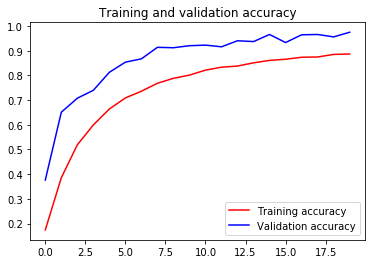

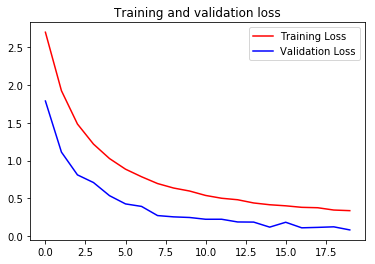

In [19]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']  # Your Code Here
val_acc = history.history['val_acc']  # Your Code Here
loss = history.history['loss']  # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()